In [23]:
import numpy as np
import matplotlib.pyplot as plt
barker7 = ([1,1,1,-1,-1,1,-1])

In [24]:
convolved = np.correlate(barker7, barker7, mode='full') #pad barker7 (or x) with 0s

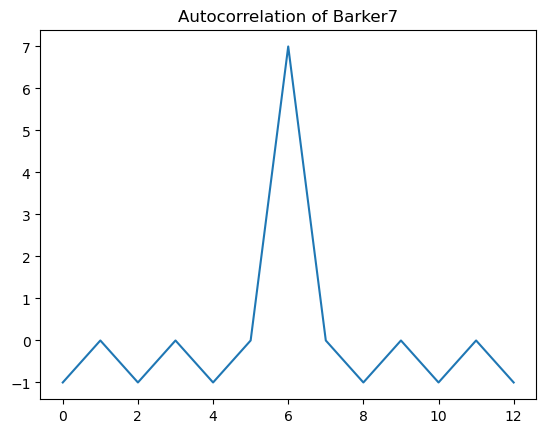

In [25]:
plt.title('Autocorrelation of Barker7')
plt.plot(convolved)
plt.show()


In [26]:
randomVector = np.random.randint(0, 2, 10)
randomVector[np.where(randomVector == 0)] = -1

In [27]:
randomVector

array([ 1, -1,  1, -1,  1,  1,  1,  1, -1, -1])

In [28]:
possibleSignal = np.append(randomVector, barker7)

In [29]:
possibleSignal

array([ 1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1])

In [30]:
findBarkerInSignal = np.correlate(possibleSignal, barker7, mode='full') #pad barker7 (or x) with 0s

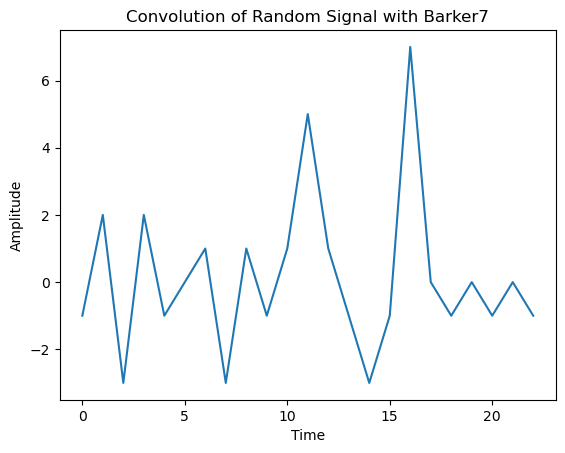

In [31]:
plt.title('Convolution of Random Signal with Barker7')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal)
plt.show()


In [32]:
'''
1. Try to introduce insertions, substitutions and deletions and see what happens to the autocorrelation of barker with itself.
2. Implement barker 13 and 11.
3. Implement a barker code with values 1,-1,i,-i
'''

'\n1. Try to introduce insertions, substitutions and deletions and see what happens to the autocorrelation of barker with itself.\n2. Implement barker 13 and 11.\n3. Implement a barker code with values 1,-1,i,-i\n'

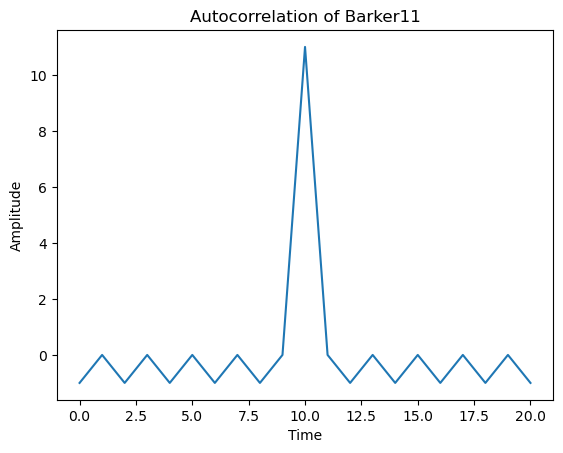

In [33]:
#Barker 11
barker11 = [+1, +1, +1, -1, -1, -1, +1, -1, -1, +1, -1]
autocorr11 = np.correlate(barker11, barker11, mode='full')
plt.title('Autocorrelation of Barker11')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(autocorr11)
plt.show()


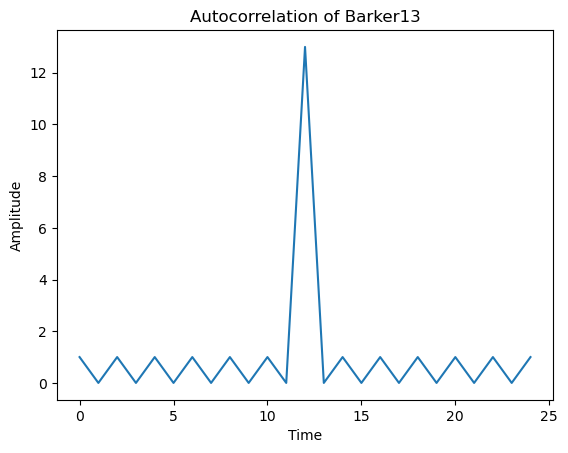

In [37]:
#Barker 13
barker13 = [+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1]
autocorr11 = np.correlate(barker13, barker13, mode='full')
plt.title('Autocorrelation of Barker13')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(autocorr11)
plt.show()

/Users/isilsusokmen/anaconda3/envs/su.python/lib/python3.11/site-packages/numpy/lib/function_base.py:5512: ComplexWarning: Casting complex values to real discards the imaginary part
  values = array(values, copy=False, ndmin=arr.ndim, dtype=arr.dtype)


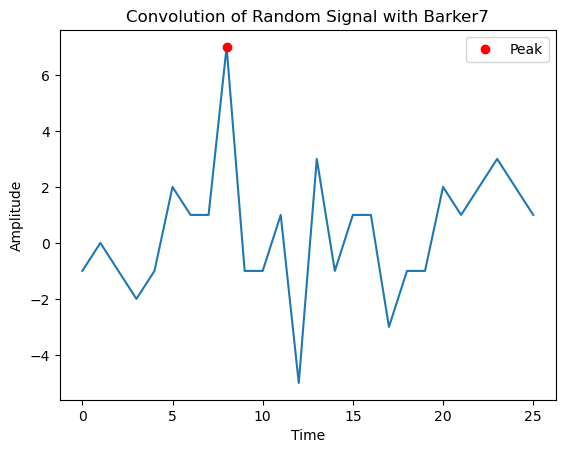

Peak index: 8
Peak value: 7


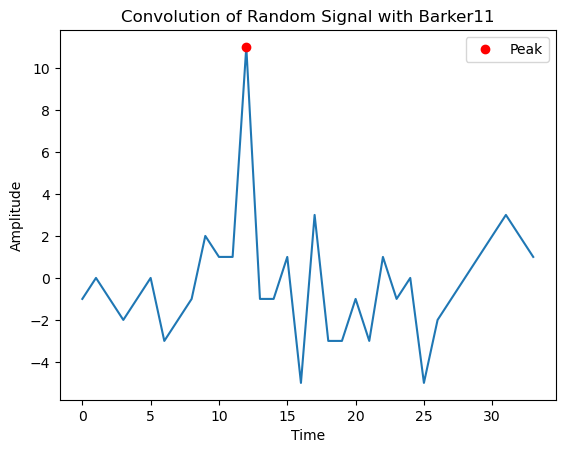

Peak index: 12
Peak value: 11


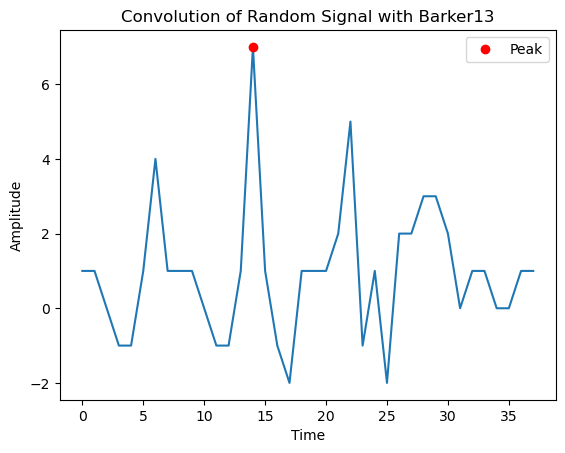

Peak index: 14
Peak value: (7+0j)


In [30]:
#barker sequences that will be implemented later 
barker7 = np.array([1,1,1,-1,-1,1,-1])
barker11 = np.array([+1, +1, +1, -1, -1, -1, +1, -1, -1, +1, -1])
barker13 = np.array([+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1])

b7_str = ''.join(str(barker7))
b11_str = ''.join(str(barker11))
b13_str = ''.join(str(barker13))

#we are currently working with vectors, randomise a vector 
#ensure the random vector doesn't host a barker sequence
found_barker = True 

#at this stage checking if barker sequence exists in random signal by converting to string can also be done w convolution 
while found_barker:
    randomVector = np.random.randint(0, 2, 13)
    randomVector[np.where(randomVector == 0)] = -1
    vct_str = ''.join(str(randomVector))
    
    if b7_str and b11_str and b13_str not in vct_str:
        found_barker = False
             
#Generate a random index and insert barker code at this location
random_index = np.random.randint(0, len(randomVector) + 1)
result_b7 = np.insert(randomVector, random_index, barker7)
result_b11 = np.insert(randomVector, random_index, barker11)
result_b13 = np.insert(randomVector, random_index, barker13)
    
#Finding barker 
findBarkerInSignal7 = np.correlate(result_b7, barker7, mode='full') 
peak_index7 = np.argmax(findBarkerInSignal7)
peak_value7 = findBarkerInSignal7[peak_index7]
plt.title('Convolution of Random Signal with Barker7')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal7)
plt.plot(peak_index7, peak_value7, 'ro', label='Peak')
plt.legend()
plt.show()

print("Peak index:", peak_index7)
print("Peak value:", peak_value7)
plt.show()

findBarkerInSignal11 = np.correlate(result_b11, barker11, mode='full') 
peak_index11 = np.argmax(findBarkerInSignal11)
peak_value11= findBarkerInSignal11[peak_index11]
plt.title('Convolution of Random Signal with Barker11')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal11)
plt.plot(peak_index11, peak_value11, 'ro', label='Peak')
plt.legend()
plt.show()

print("Peak index:", peak_index11)
print("Peak value:", peak_value11)
plt.show()

findBarkerInSignal13 = np.correlate(result_b13, barker13, mode='full') 
peak_index13 = np.argmax(findBarkerInSignal13)
peak_value13= findBarkerInSignal13[peak_index13]
plt.title('Convolution of Random Signal with Barker13')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal13)
plt.plot(peak_index13, peak_value13, 'ro', label='Peak')
plt.legend()
plt.show()

print("Peak index:", peak_index13)
print("Peak value:", peak_value13)
plt.show()


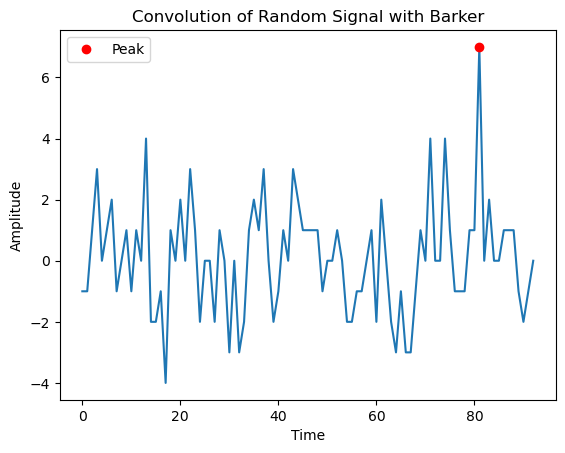

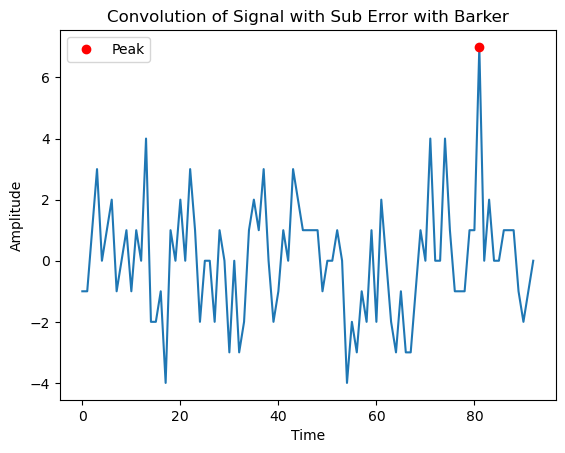

                   Without Error    With Substitution Error
-----------------  ---------------  -------------------------
Barker index       81               81
Barker peak value  7.0+0.0j         7.0+0.0j
Error Rate         0                0.2


In [163]:

from tabulate import tabulate
import numpy as np 
import matplotlib.pyplot as plt
import random

barker7 = [1, 1j, -1, 1j, -1, 1j, 1]
barker11 = [1, 1j, -1, 1j, -1, -1j, -1, 1j, -1, 1j, 1]
barker13 = [1, 1j, -1, -1j, 1, -1j, 1, -1j, 1, -1j, -1, 1j, 1]
elements = [1,-1,1j,-1j]
vector_length = 80

def check_barker_occurrence(vector):
    barker_patterns = [barker7, barker11, barker13]
    for pattern in barker_patterns:
        count = 0
        for i in range(len(vector) - len(pattern) + 1):
            if vector[i:i + len(pattern)] == pattern:
                count += 1
                if count > 1:
                    return False
    return True

def inject_barker(vector):
    barker_choice = random.choice([barker7, barker11, barker13])
    random_index = np.random.randint(0, len(vector) + 1)
    vector = np.insert(vector, random_index, barker_choice)
    return vector, barker_choice

def generate_vector_with_single_barker():
    while True:
        randomVector = [random.choice(elements) for _ in range(vector_length)]
        if check_barker_occurrence(randomVector):  # it returns True if no Barker codes exist
            randomVector, barker_choice = inject_barker(randomVector)
            return randomVector, barker_choice
        
    '''
    while True:
        randomVector = [random.choice(elements) for _ in range(vector_length)]
        if check_barker_occurrence(randomVector):
            randomVector, barker_choice = inject_barker(randomVector)
            return randomVector, barker_choice
    '''

randomVector, barker_choice = generate_vector_with_single_barker()

#finds barker with out the 
findBarkerInSignal = np.correlate(randomVector, barker_choice, mode='full') 
peak_index = np.argmax(findBarkerInSignal)
peak_value = findBarkerInSignal[peak_index]
plt.title('Convolution of Random Signal with Barker')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal)
plt.plot(peak_index, peak_value, 'ro', label='Peak')
plt.legend()
plt.show()


#function assumes probability matrix is normalized 
def substitution_error(vector,error_rate, conf_matrix):
    
    barker_seq_w_errors=vector.copy()
    #mapping system 
    nucelotide_to_barker = {'A': 1, 'C': -1j, 'G':1j, 'T':-1j}
    barker_to_nucleotide = {1: 'A', -1j: 'C', 1j: 'G', -1: 'T'}

    for i in range(len(vector)):
        
        #check if error will occur for the nucelotide 
        if np.random.rand() < error_rate:
            barker_value = vector[i]
        
            #use confusion matrix to see substitution probabibilty 
            probabilities = confusion_matrix[list(barker_to_nucleotide.keys()).index(barker_value)]
            new_value = np.random.choice(list(barker_to_nucleotide.keys()), p=probabilities)
            
            barker_seq_w_errors[i] = new_value
    
    return barker_seq_w_errors

#the confusion matrix found in the course (A,C,G,T)
confusion_matrix = [
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.95, 0.05, 0.0],
    [0.0, 0.05, 0.95, 0.0],
    [0.0, 0.0, 0.0, 1.0]
]
error_rate = 0.2
#find barker with errors 
barker_seq_w_errors = substitution_error(randomVector,error_rate,confusion_matrix)
findBarkerInSignal_w_error = np.correlate(barker_seq_w_errors, barker_choice, mode='full') 
peak_index2 = np.argmax(findBarkerInSignal_w_error)
peak_value2 = findBarkerInSignal_w_error[peak_index2]
plt.title('Convolution of Signal with Sub Error with Barker')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal_w_error)
plt.plot(peak_index2, peak_value2, 'ro', label='Peak')
plt.legend()
plt.show()

table = [["Barker index", peak_index, peak_index2],
         ["Barker peak value", f"{peak_value.real}+{peak_value.imag}j", f"{peak_value2.real}+{peak_value2.imag}j"],
         ["Error Rate", 0, error_rate]]
print(tabulate(table, headers=["", "Without Error", "With Substitution Error"]))


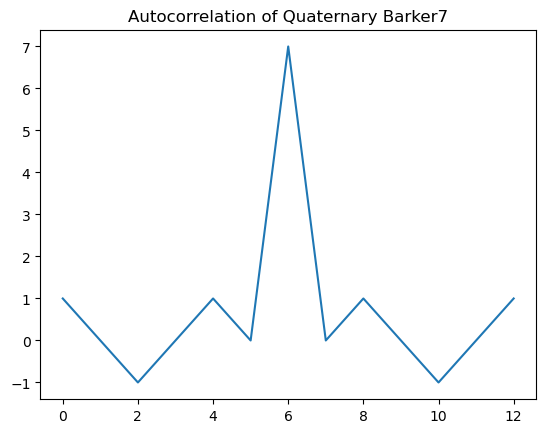

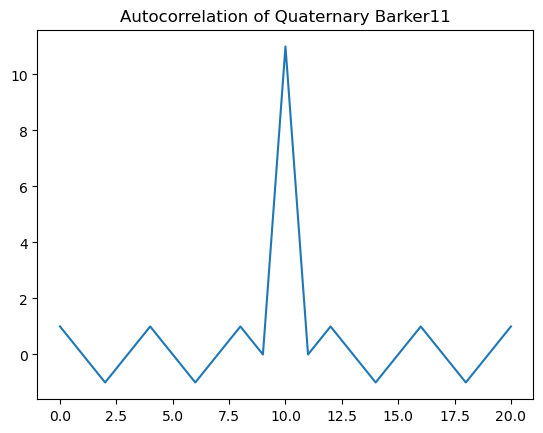

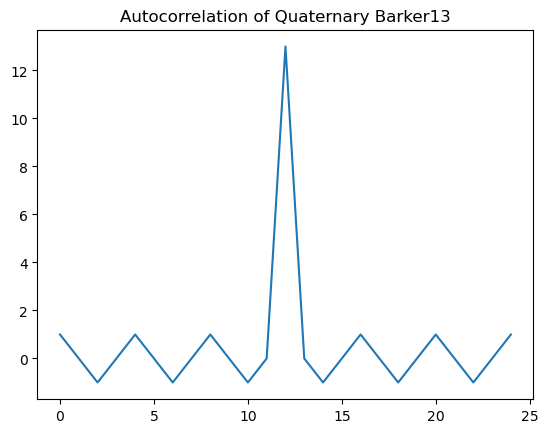

In [164]:
#Barker code with quarternary symbols: +/- 1 and +/-i
quat1 = [1]
quat2 = [1, 1j]
quat3 = [1, 1j, 1]
quat4 = [1, 1j, -1, 1j]
quat5 = [1, 1j, -1, 1j, 1]
quat7 = [1, 1j, -1, 1j, -1, 1j, 1]
quat11 = [1, 1j, -1, 1j, -1, -1j, -1, 1j, -1, 1j, 1]
quat13 = [1, 1j, -1, -1j, 1, -1j, 1, -1j, 1, -1j, -1, 1j, 1]

autocorrQuat7 = np.correlate(quat7, quat7, mode='full')
plt.title('Autocorrelation of Quaternary Barker7')
plt.plot(autocorrQuat7)
plt.show()

autocorrQuat11 = np.correlate(quat11, quat11, mode='full')
plt.title('Autocorrelation of Quaternary Barker11')
plt.plot(autocorrQuat11)
plt.show()

autocorrQuat13 = np.correlate(quat13, quat13, mode='full')
plt.title('Autocorrelation of Quaternary Barker13')
plt.plot(autocorrQuat13)
plt.show()
